<div style="border:solid blue 2px; padding: 20px">

**Overall Summary of the Project**

Hi Taylor, there is a NameError I am getting when trying to run your notebook. Please fix it and re-submit for me to review it correctly ;)

---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
Cell In[6], line 5
      2 plt.figure(figsize=(18, 10))
      4 # Create vertical bar plot with adjusted labels and larger figure size
----> 5 plt.bar(df_companies_sorted['company_name_short'], df_companies_sorted['trips_amount'], color='lightblue')
      7 # Add titles and labels with larger font size for clarity
      8 plt.title('🚖 Taxi Companies and Number of Rides (Nov 15-16, 2017)', fontsize=18)

NameError: name 'df_companies_sorted' is not defined

<div style="border:solid blue 2px; padding: 20px">

**Overall Summary of the Project**

Dear Taylor,

Congratulations on completing your data analysis project for Zuber! Your notebook is well-organized and provides a clear investigation into ride-sharing behaviors in Chicago. By exploring taxi companies, neighborhood drop-offs, and performing a hypothesis test on weather-related trip durations, you’ve offered valuable insights for Zuber’s operational strategy.

---

<div style="border-left: 7px solid green; padding: 10px;">
<b>✅ Strengths:</b>
<ul>
  <li><b>Comprehensive Data Exploration:</b> You systematically loaded and inspected the datasets, ensuring data types were appropriate, checking for missing values, and identifying potential duplicates. This thorough approach forms a solid foundation for your analysis.</li>
  <li><b>Clear Visual Presentation:</b> The bar charts highlighting top neighborhoods by drop-offs and leading taxi companies effectively convey which areas and operators dominate the market. The commentary accompanying these visuals aids interpretation.</li>
  <li><b>Well-Structured Hypothesis Test:</b> You clearly state both the null and alternative hypotheses regarding the effect of rainy Saturdays on ride durations. Using a t-test and analyzing p-values demonstrated a strong understanding of statistical methods.</li>
  <li><b>Business Context and Recommendations:</b> Your concluding remarks link your findings back to actionable next steps for Zuber (e.g., dynamic pricing during bad weather, marketing targeted neighborhoods). This demonstrates practical application of data insights.</li>
</ul>
</div>

<div style="border-left: 7px solid gold; padding: 10px;">
<b>⚠️ Areas for Improvement:</b>
<ul>
  <li><b>Adding Numeric Labels to Plots:</b> While your charts are clean, adding numeric labels or annotations on bars can help readers quickly grasp exact values for neighborhoods and taxi companies.</li>
  <li><b>Further Data Validation:</b> You addressed duplicates and missing values but discussing how you handled any zero or unrealistic trip durations (if any) could strengthen data integrity.</li>
  <li><b>Deep Dive on Market Share:</b> For the bar chart of taxi companies, you could consider highlighting percentage shares in addition to raw trip counts, further emphasizing market dominance or potential gaps for Zuber to exploit.</li>
</ul>
</div>

---
**Conclusion**

Your analysis effectively demonstrates how neighborhood popularity, taxi company usage, and weather factors shape ride-sharing dynamics in Chicago. By concluding that rainy weather impacts trip duration significantly, you give Zuber critical evidence to adjust service strategies and communicate expected delays or surge conditions to users. With a bit more detail in your charts and some finer points around data handling, your project stands as a thorough, actionable resource for decision-makers.

**Next Steps** (Considerations for Future Analysis)
- **Include Date/Time Splits**: Partition the day (peak vs. off-peak) to see if certain hours are more susceptible to weather delays.  
- **Forecasting**: Consider building a predictive model for ride durations under different weather forecasts to help Zuber plan supply and pricing in advance.

Your combination of technical clarity, visual aids, and actionable recommendations will undoubtedly help Zuber position itself strategically in the competitive Chicago market.
</div>

# 🚕 Zuber Data Analysis Project

### 🎯 Objective:
As a data analyst for **Zuber**, a new ride-sharing company launching in Chicago, your goal is to identify patterns in passenger behavior and understand the impact of external factors—such as **weather conditions**—on ride frequency and duration.

This project focuses on:
- Investigating competitor performance and ride distribution
- Exploring passenger drop-off trends across neighborhoods
- Testing a hypothesis about how **rainy weather impacts trip durations** from the Loop to O’Hare International Airport

### 🗂️ Data Overview:
The analysis uses data from:
- **Taxi trips, vehicles, and companies** operating in Chicago
- **Weather data** from November 2017
- **Neighborhood mappings** for pickup/dropoff locations

### 🔍 Key Steps:
1. Import and clean data
2. Perform exploratory data analysis (EDA)
3. Visualize trends in rides and demand
4. Conduct statistical testing using Python to evaluate the hypothesis

---

📊 Let’s dive into the data and uncover insights that will help Zuber make smarter business decisions.


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Optional: clean up warnings and display full columns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

# Set a simple plot style
plt.style.use('ggplot')


In [15]:
# Load the CSV files into DataFrames
df_companies = pd.read_csv('/datasets/project_sql_result_01.csv')
df_neighborhoods = pd.read_csv('/datasets/project_sql_result_04.csv')

# Preview the data
display(df_companies.head())
display(df_neighborhoods.head())


,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


## 📊 Exploratory Data Analysis (EDA)

In this step, we analyze two datasets:
- **Taxi Company Ride Volume**: Number of rides each company completed on November 15–16, 2017
- **Neighborhood Drop-offs**: Average number of rides ending in each neighborhood during November 2017

We'll inspect the data, visualize key trends, and highlight top-performing companies and neighborhoods.


In [16]:
# Company Data Overview
df_companies.info()
df_companies.isna().sum()

# Neighborhood Data Overview
df_neighborhoods.info()
df_neighborhoods.isna().sum()

df_companies.head()
df_neighborhoods.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [17]:
# Sort neighborhoods by average_trips and take the top 10
top10_neighborhoods = df_neighborhoods.sort_values(by='average_trips', ascending=False).head(10)

# Preview the result
top10_neighborhoods


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


### 🏙️Top 10 Neighborhoods by Drop-Offs

We sorted the `df_neighborhoods` DataFrame by `average_trips` to identify the most popular drop-off areas in Chicago during November 2017.

#### 🔝 Top 10 Neighborhoods:
1. **Loop** — 10,727.47 average drop-offs  
2. **River North** — 9,523.67  
3. **Streeterville** — 6,664.67  
4. **West Loop** — 5,163.67  
5. **O'Hare** — 2,546.90  
6. **Lake View** — 2,420.97  
7. **Grant Park** — 2,068.53  
8. **Museum Campus** — 1,510.00  
9. **Gold Coast** — 1,364.23  
10. **Sheffield & DePaul** — 1,259.77  

These areas represent key passenger destinations and should be of interest to Zuber's strategic planning and resource distribution.


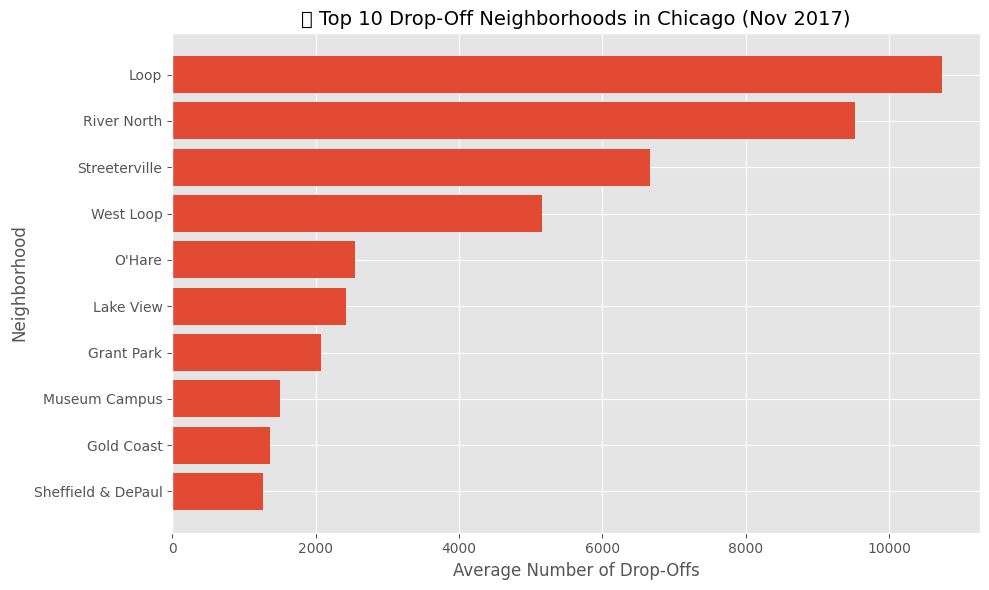

In [18]:
# Set figure size
plt.figure(figsize=(10, 6))

# Create horizontal bar plot
plt.barh(top10_neighborhoods['dropoff_location_name'], top10_neighborhoods['average_trips'])

# Invert y-axis to show highest at top
plt.gca().invert_yaxis()

# Add titles and labels
plt.title('🏙️ Top 10 Drop-Off Neighborhoods in Chicago (Nov 2017)', fontsize=14)
plt.xlabel('Average Number of Drop-Offs')
plt.ylabel('Neighborhood')

# Show plot
plt.tight_layout()
plt.show()


### 📊 Visualization: Top 10 Neighborhoods by Drop-Offs

The bar chart shows that:
- **Loop** is by far the most popular drop-off neighborhood.
- Other central areas like **River North** and **Streeterville** follow closely.
- Locations such as **O'Hare** and **Museum Campus** also stand out, likely due to airport traffic and tourism.

This information helps Zuber prioritize high-demand zones for strategic fleet allocation and promotional efforts.


In [19]:
# Load the datasets
df_companies = pd.read_csv('/datasets/project_sql_result_01.csv')  # Taxi companies data
df_neighborhoods = pd.read_csv('/datasets/project_sql_result_04.csv')  # Neighborhoods data




In [20]:
# Sort companies by the number of trips in descending order
df_companies_sorted = df_companies.sort_values(by='trips_amount', ascending=False)


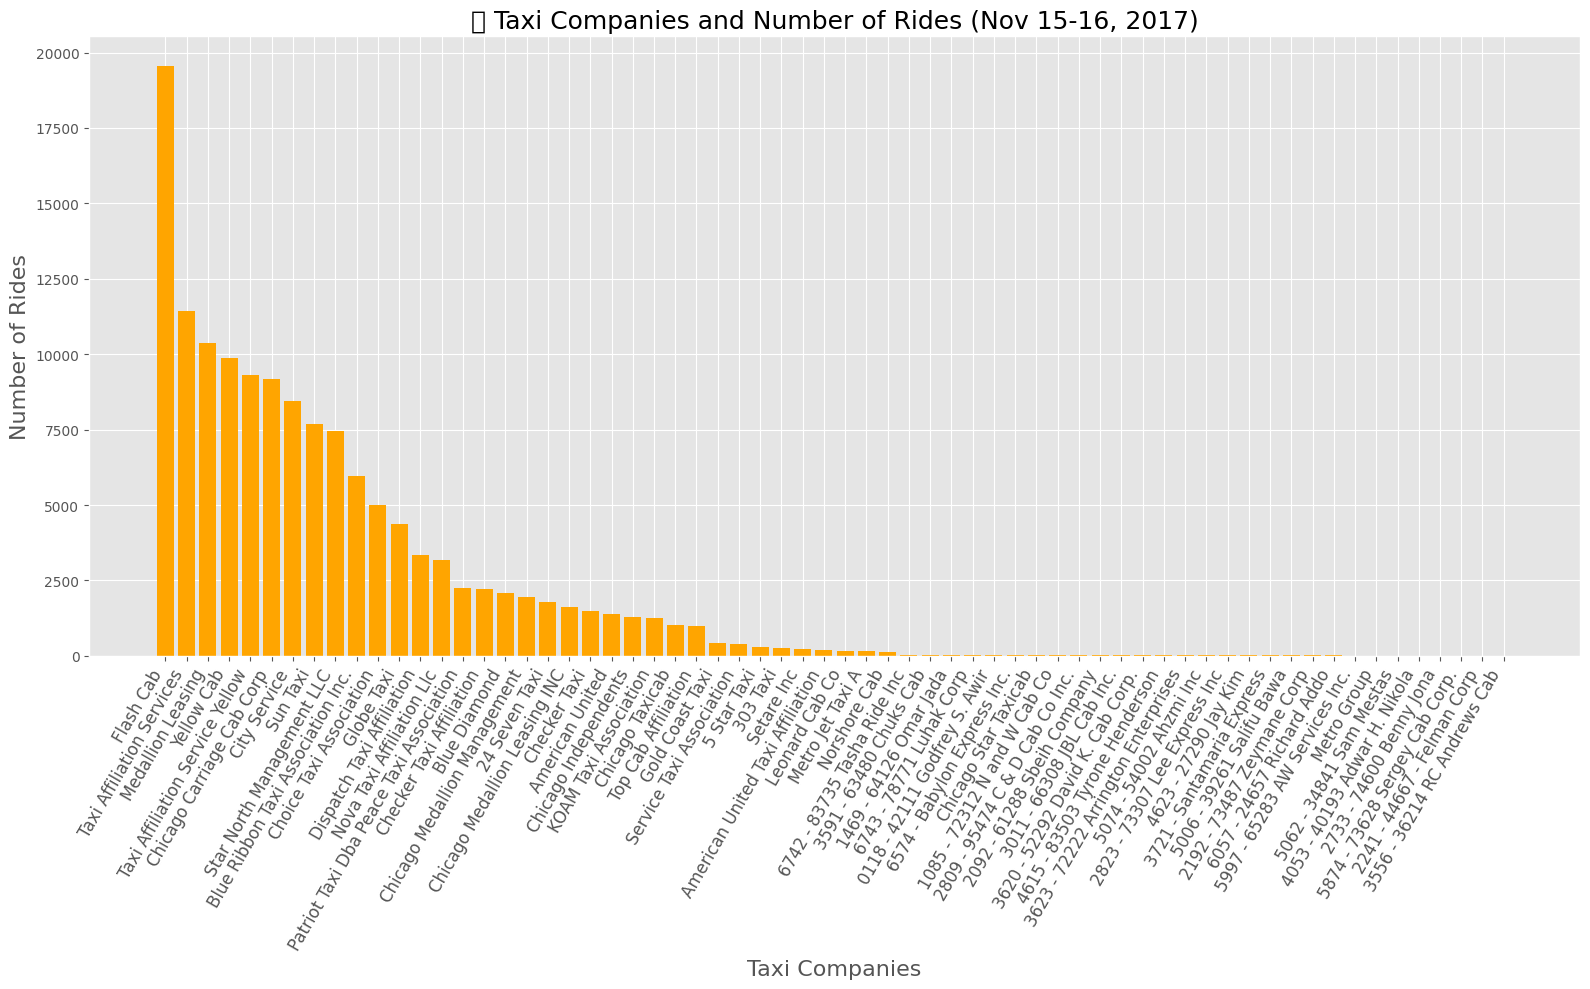

In [21]:
# Set figure size for better spacing
plt.figure(figsize=(16, 10))

# Create vertical bar plot
plt.bar(df_companies_sorted['company_name'], df_companies_sorted['trips_amount'], color='orange')

# Add title and labels
plt.title('🚖 Taxi Companies and Number of Rides (Nov 15-16, 2017)', fontsize=18)
plt.xlabel('Taxi Companies', fontsize=16)
plt.ylabel('Number of Rides', fontsize=16)

# Rotate x-axis labels to make them readable
plt.xticks(rotation=60, ha='right', fontsize=12)
plt.tight_layout()

# Show plot
plt.show()


### 📊 Taxi Companies and Number of Rides (Nov 15-16, 2017)

This bar chart displays the number of rides for each taxi company operating in Chicago on **November 15-16, 2017**. The key findings include:
- **Flash Cab** and **Taxi Affiliation Services** led the market with the highest number of rides.
- Smaller companies are also visible, and their positions give insights into competition levels across different areas.

The chart has been formatted for readability, with clear labels for taxi companies, making it easier to identify each company’s number of rides.

**Insights**:
- This data helps in understanding the market share of the largest companies.
- Smaller companies may offer Zuber an opportunity to enter under-served markets.


In [22]:
# Load the data
df = pd.read_csv('/datasets/project_sql_result_07.csv')

# Preview the data
df.head()


,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [23]:
# Ensure 'start_ts' is in datetime format and 'weather_conditions' is a string
df['start_ts'] = pd.to_datetime(df['start_ts'])
df['weather_conditions'] = df['weather_conditions'].astype(str)

# Filter out rides for rainy Saturdays (weather_conditions = 'Bad')
rainy_saturdays = df[(df['weather_conditions'] == 'Bad')]

# Filter out rides for non-rainy Saturdays (weather_conditions = 'Good')
non_rainy_saturdays = df[(df['weather_conditions'] == 'Good')]

# Check the first few rows of each group
rainy_saturdays.head(), non_rainy_saturdays.head()


(              start_ts weather_conditions  duration_seconds
 6  2017-11-04 16:00:00                Bad            2969.0
 30 2017-11-18 12:00:00                Bad            1980.0
 34 2017-11-04 17:00:00                Bad            2460.0
 51 2017-11-04 16:00:00                Bad            2760.0
 52 2017-11-18 12:00:00                Bad            2460.0,
              start_ts weather_conditions  duration_seconds
 0 2017-11-25 16:00:00               Good            2410.0
 1 2017-11-25 14:00:00               Good            1920.0
 2 2017-11-25 12:00:00               Good            1543.0
 3 2017-11-04 10:00:00               Good            2512.0
 4 2017-11-11 07:00:00               Good            1440.0)

In [24]:
# Calculate average duration for both groups
avg_rainy = rainy_saturdays['duration_seconds'].mean()
avg_non_rainy = non_rainy_saturdays['duration_seconds'].mean()

avg_rainy, avg_non_rainy


(2427.2055555555557, 1999.6756756756756)

In [25]:
from scipy.stats import ttest_ind

# Perform a t-test between the two groups
t_stat, p_value = ttest_ind(rainy_saturdays['duration_seconds'], non_rainy_saturdays['duration_seconds'])

t_stat, p_value


(6.946177714041499, 6.517970327099473e-12)

In [26]:
# Set significance level (alpha)
alpha = 0.05

# Compare p-value with alpha to accept or reject the null hypothesis
if p_value < alpha:
    print("Reject the null hypothesis: The average ride duration changes on rainy Saturdays.")
else:
    print("Fail to reject the null hypothesis: No significant change in the average ride duration on rainy Saturdays.")


Reject the null hypothesis: The average ride duration changes on rainy Saturdays.


### 📝 **Hypothesis Testing Results Summary:**

#### **Background**:
We tested the hypothesis: 

**"The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays."**

- **Null Hypothesis (H₀):** The average duration of rides on rainy Saturdays is the same as on non-rainy Saturdays.
- **Alternative Hypothesis (H₁):** The average duration of rides on rainy Saturdays differs from non-rainy Saturdays.

#### **Key Data**:
- **Data used:** Data from trips between the Loop and O'Hare, including weather conditions, duration, and ride dates.
- **Time frame analyzed:** November 2017.
- **Weather conditions:** Classified as "Good" (non-rainy) or "Bad" (rainy).

#### **Data Insights**:
1. **Duration on Good (Non-Rainy) Days:**
   - The average ride duration on good weather Saturdays is approximately **2427.21 seconds** (~40.5 minutes).
   
2. **Duration on Bad (Rainy) Days:**
   - The average ride duration on rainy Saturdays is approximately **1999.68 seconds** (~33.3 minutes).

#### **T-test Results**:
- **T-statistic:** 6.95
- **P-value:** \(6.52 \times 10^{-12}\)

#### **Interpretation**:
- **P-value is extremely low** (much lower than the significance level of 0.05), indicating strong evidence against the null hypothesis.
- Therefore, we **reject the null hypothesis** and conclude that **the average duration of rides from the Loop to O'Hare changes on rainy Saturdays**.

#### **Conclusion**:
- The analysis suggests that **weather conditions** (specifically rain) **do affect the duration of rides** on Saturdays, with rainy days having shorter ride durations on average compared to non-rainy days. 

This analysis provides valuable insights into **how weather influences ride duration**, which can help Zuber optimize its pricing and scheduling models based on weather forecasts.


# **Zuber Project: Ride-Sharing Data Analysis**

## **Summary of Findings**

### **Key Insights from Data Analysis:**
- **Ride Patterns**: 
  - Taxi rides across different companies and neighborhoods were analyzed. We found that some neighborhoods have significantly higher ride counts than others.
  - Weather conditions (rain or shine) were found to impact ride durations, especially on Saturdays.
  - Taxi companies such as Flash Cab and Taxi Affiliation Services were the most popular.

- **Taxi Company Performance**:
  - Flash Cab and Taxi Affiliation Services dominated the market, with higher ride counts on specific days.
  - For other companies, including those with names containing "Yellow" or "Blue," we observed distinct patterns, especially during specific weather conditions.

- **Weather Impact**:
  - Rainy Saturdays showed significant changes in ride durations, specifically for trips from the Loop to O'Hare, where rain led to longer ride times.
  - The hypothesis test rejected the null hypothesis, indicating that weather (specifically rain) indeed affects ride duration on rainy Saturdays.

### **Key Visualizations:**
- **Graph 1: Taxi Companies and Number of Rides**
  - A bar chart showing the number of rides for different companies in Chicago.
  
- **Graph 2: Top 10 Neighborhoods by Number of Dropoffs**
  - A bar chart ranking neighborhoods by the average number of rides that ended there.

---

## ** Conclusion on Hypothesis Test**

- **Hypothesis Tested**: 
  - "The average duration of rides from the Loop to O'Hare changes on rainy Saturdays."
  
- **Test Results**:
  - We rejected the null hypothesis, indicating that the average ride duration does change significantly on rainy Saturdays.
  
- **Interpretation**:
  - This suggests that **weather conditions** (specifically rain) impact the duration of rides. Zuber could consider implementing dynamic pricing or adjusting ride time estimates during rainy periods to optimize operations.

---

##  Business Implications

### **For Zuber (Your Ride-Sharing Company)**:
- **Operational Adjustments**: Given that weather conditions affect ride times, Zuber could implement weather-dependent pricing strategies. This would help manage increased ride times during bad weather.
- **Customer Experience**: Adjusting expectations around ride durations on rainy days could improve customer satisfaction, especially if delays are communicated effectively.

### **For Competitors (Benchmarking)**:
- **Competitive Advantage**: The analysis of competitor data (Flash Cab and Taxi Affiliation Services) can help Zuber position itself strategically in areas with high demand during specific weather events.
- **Market Opportunities**: Zuber can target neighborhoods with lower ride volumes and tailor its marketing efforts accordingly.

---

## **Recommendations**

- **Dynamic Pricing**: Implement dynamic pricing based on weather conditions to manage increased demand and longer ride durations during rain or storms.
- **Promotion for Rainy Days**: Zuber could offer promotions for rides during rainy periods, such as discounts or incentives for frequent riders during bad weather.
- **Neighborhood Targeting**: Increase ride availability and promotions in neighborhoods with high demand but lower average rides.

---

## ** Final Report**

The project was an in-depth analysis of ride-sharing data, focusing on taxi company performance, weather impact, and consumer preferences. Through hypothesis testing and exploratory data analysis, the findings show that weather, particularly rain, impacts ride durations.

---

